# **Connecting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataz/attrition.csv')

In [ ]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df = dataset.copy()

# **Data Visualization**

In [ ]:
df.groupby('Department')[['MonthlyIncome', 'Age']].mean().sort_values(by='MonthlyIncome', ascending=False)

,MonthlyIncome,Age
Department,,
Sales,6959.172646,36.542601
Human Resources,6654.507937,37.809524
Research & Development,6281.252862,37.042664


## **Department with MonthlyIncome**
- Sales -> 6959.17
- Human Resources -> 6654.50
- Research & Development -> 6281.25

## **Department with Age**
- Sales -> 36.54
- Human Resources -> 37.80
- Research & Development -> 37.04

In [ ]:
group = df.groupby('JobRole')[['MonthlyIncome', 'Age']].mean().sort_values(by='MonthlyIncome', ascending=False).reset_index()

In [ ]:
px.bar(group, x='JobRole', y='MonthlyIncome', title='Monthly Income Avg by Job Role')

In [ ]:
px.bar(group, x='JobRole', y='Age', title='Age Avg by Job Role')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

<ipython-input-14-45c75be872ad>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [ ]:
df.drop(['Over18','EmployeeCount','StandardHours'], axis=1,inplace=True)

In [ ]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel':3}).astype(int)
df['Department'] = df['Department'].replace({'Research & Development': 0, 'Human Resources': 1, 'Sales': 2}).astype(int)
df['EducationField'] = df['EducationField'].replace({'Life Sciences':0, 'Other':1, 'Medical':2, 'Technical Degree':3, 'Human Resources':4, 'Marketing':5}).astype(int)
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1}).astype(int)
df['JobRole'] = df['JobRole'].replace({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2, 'Manufacturing Director':3, 'Healthcare Representative':4, 'Sales Representative':5, 'Research Director':6, 'Human Resources':7, 'Manager':8}).astype(int)
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0, 'Married':1, 'Divorced':2}).astype(int)
df['OverTime'] = df['OverTime'].replace({'No':0, 'Yes':1}).astype(int)
df['Attrition'] = df['Attrition'].replace({'Yes':1, 'No':0}).astype(int)

<ipython-input-17-9396a06e3be3>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-17-9396a06e3be3>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-17-9396a06e3be3>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-17-9396a06e3be3>:4: FutureWarning:

Downcastin

In [ ]:
df.corr().reset_index()[['index', 'Attrition']]

,index,Attrition
0,Age,-0.159205
1,Attrition,1.000000
2,BusinessTravel,-0.024325
3,DailyRate,-0.056652
4,Department,0.085118
5,DistanceFromHome,0.077924
6,Education,-0.031373
7,EducationField,0.072325
8,EmployeeNumber,-0.010577
9,EnvironmentSatisfaction,-0.103369


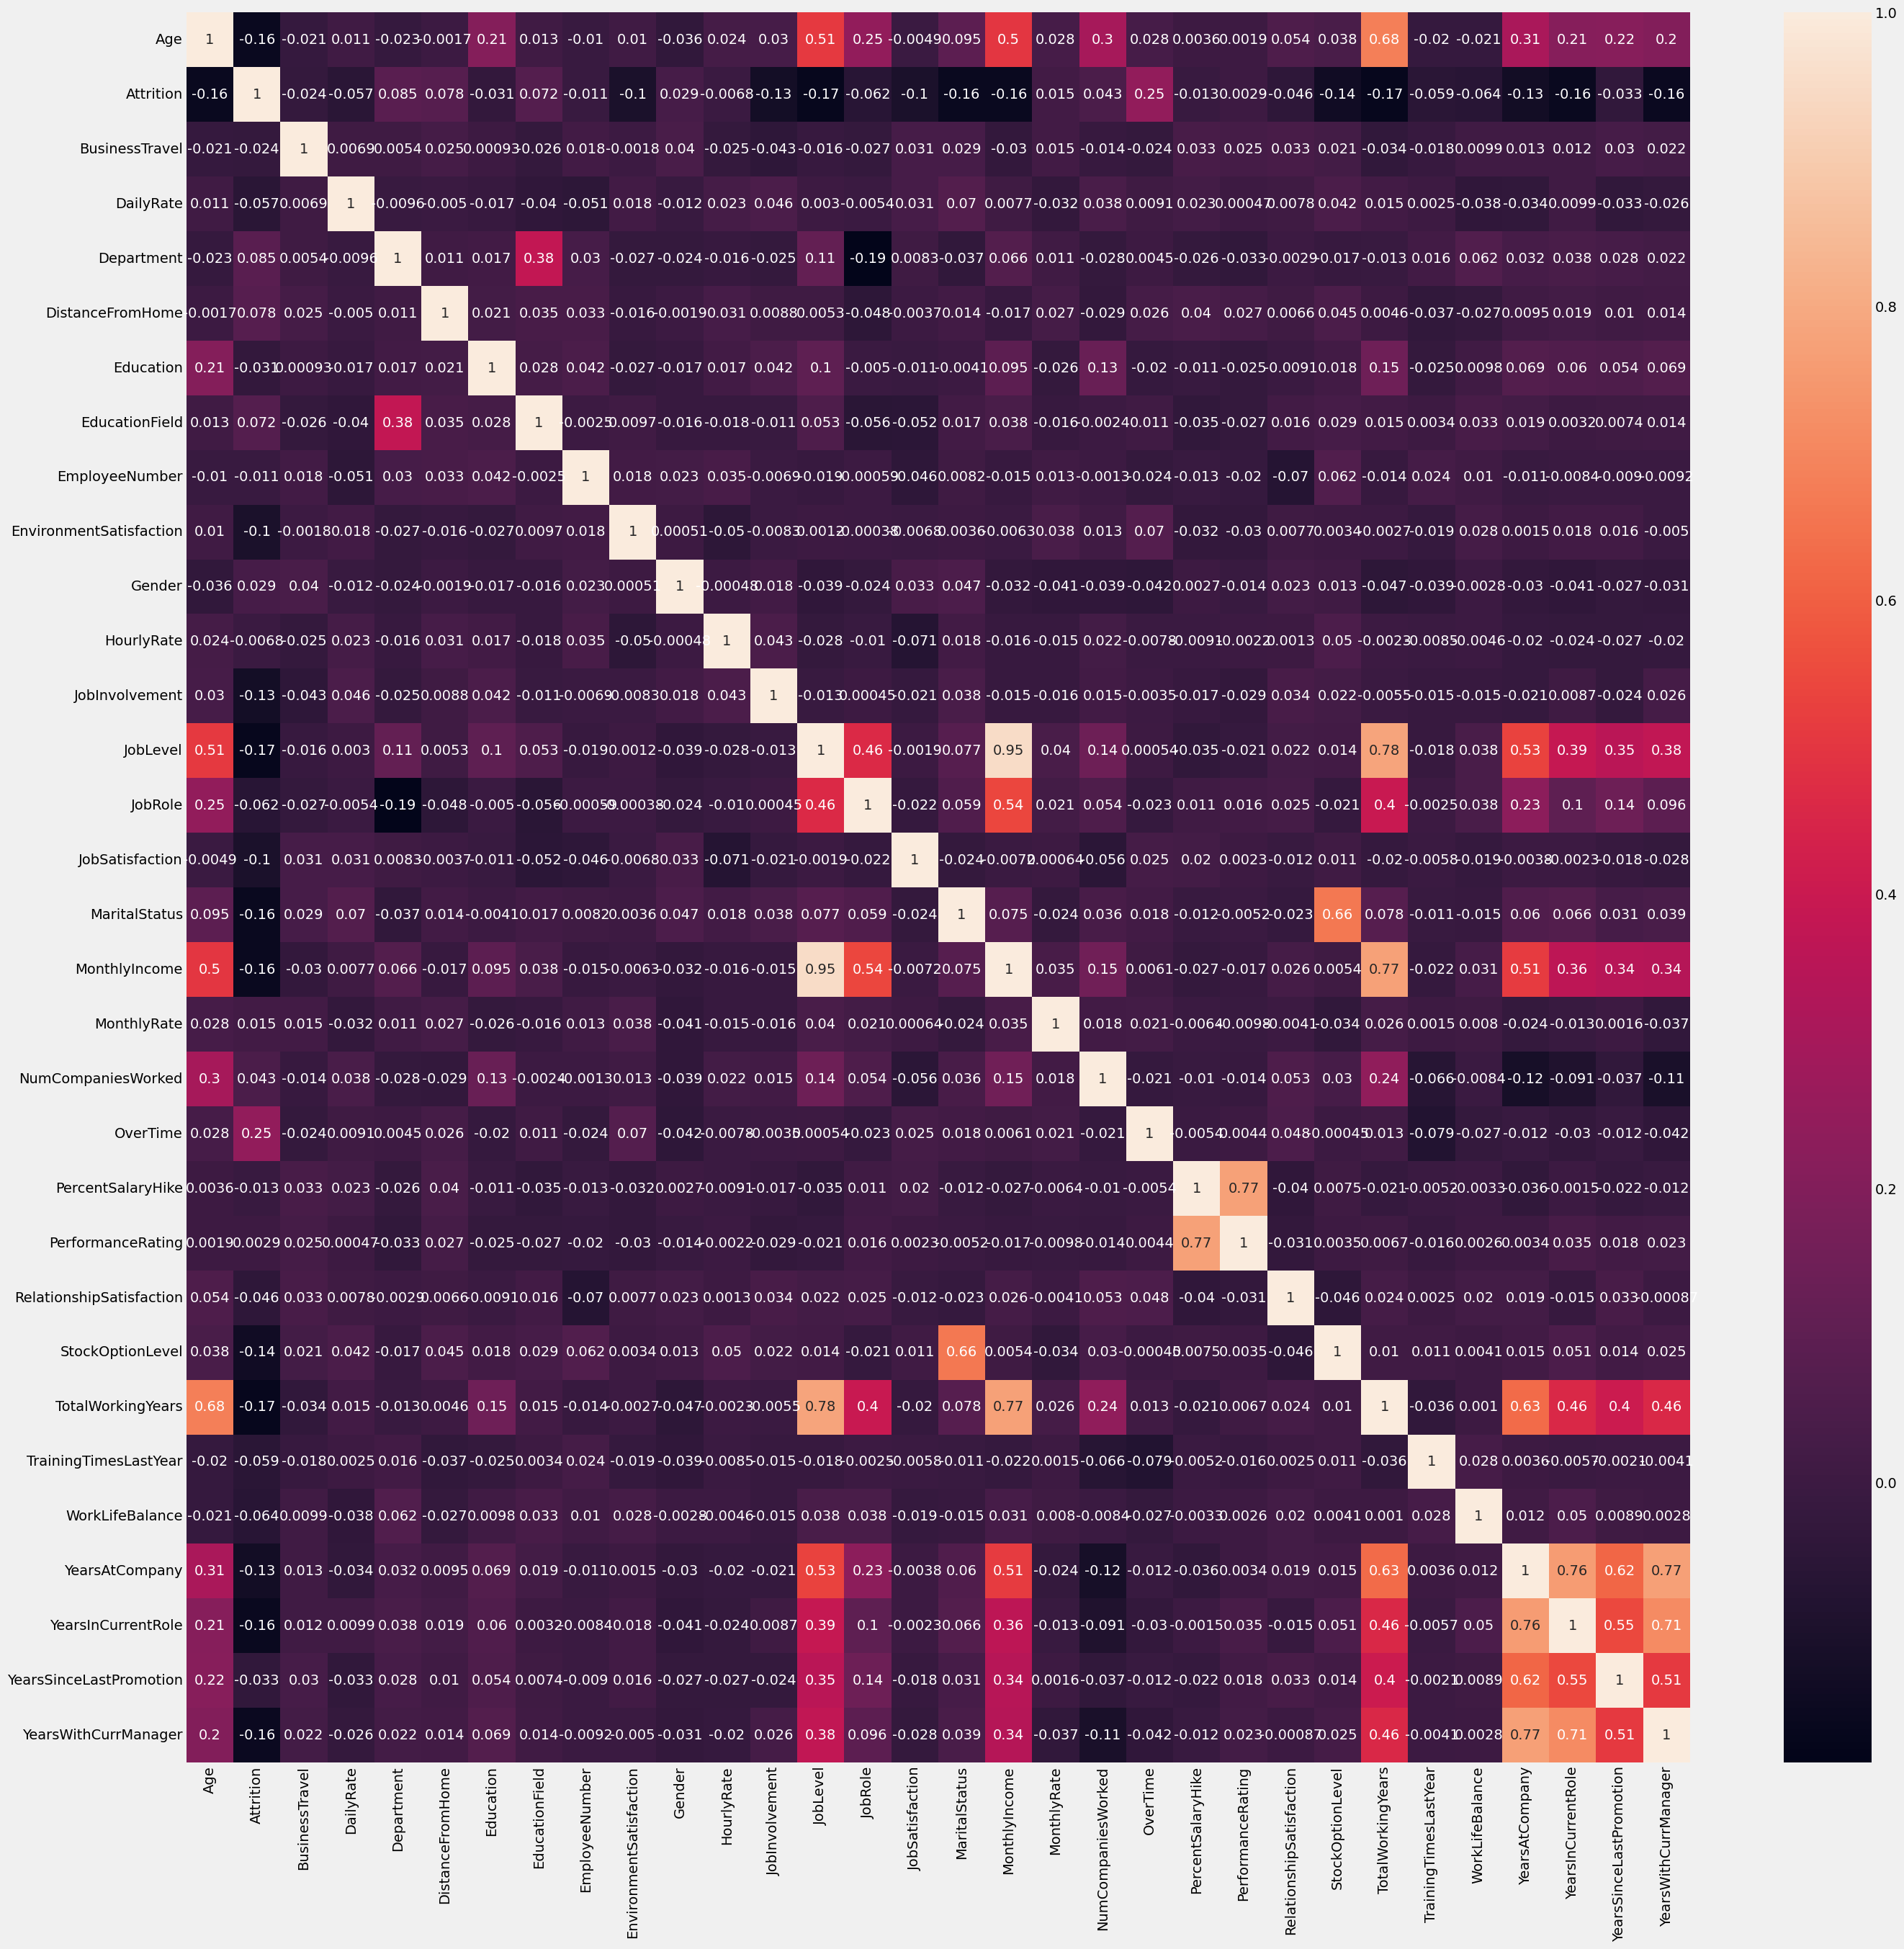

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.891156462585034


In [ ]:
confusion_matrix(y_test, y_pred)

array([[250,   5],
       [ 27,  12]])

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='random')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7925170068027211


In [ ]:
confusion_matrix(y_test, y_pred)

array([[222,  33],
       [ 28,  11]])

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877551020408163


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
components = pca.components_

# Create a DataFrame for easier interpretation
loading_matrix = pd.DataFrame(components, columns=X.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])
loading_matrix

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PC1,0.278356,0.005161,-0.001779,0.020916,-0.002740,0.078386,0.023993,-0.007031,0.012461,-0.035941,...,0.002351,0.016901,0.016316,0.400010,-0.005788,0.016536,0.373921,0.322049,0.275094,0.306584
PC2,0.314187,-0.079153,0.083606,-0.070220,-0.047277,0.118361,0.002456,0.005548,0.001963,-0.016306,...,-0.068057,0.063225,0.005591,0.178340,-0.042582,0.010370,-0.306468,-0.363083,-0.278401,-0.380782
PC3,0.035473,0.051290,0.058580,-0.116589,0.080164,-0.026879,-0.105108,-0.064163,-0.029701,0.034468,...,0.680690,-0.056208,-0.007061,0.034627,-0.029140,-0.070401,-0.033290,-0.017360,-0.003206,-0.029672
PC4,0.034304,0.086662,0.101093,-0.061277,0.055254,0.016063,0.002748,0.031280,-0.009154,0.063853,...,-0.007087,-0.037737,0.689341,-0.019085,0.051877,0.007456,0.000614,0.039867,-0.024062,0.013754
PC5,0.032202,0.002898,-0.039542,0.654446,0.119496,0.137613,0.630697,0.054622,-0.091267,-0.035692,...,0.118515,0.016527,0.033460,-0.007551,0.021026,0.164426,-0.045990,-0.029070,-0.036469,-0.023353
PC6,0.180983,-0.162738,-0.211045,-0.145405,0.072953,0.506839,-0.114455,0.269361,-0.219930,0.062542,...,-0.001549,-0.118142,-0.040653,0.040122,-0.074225,-0.110038,0.028076,0.061057,0.020462,0.118482
PC7,0.139998,0.058908,0.162583,0.003406,0.184331,0.120152,0.045147,-0.303102,0.070218,0.021098,...,-0.022677,0.281442,-0.030741,0.040697,-0.434698,-0.370677,0.022810,0.026266,0.043892,0.054320
PC8,0.004050,0.080776,-0.314376,-0.037115,0.211109,0.114721,-0.050703,0.332481,0.479650,-0.247272,...,0.028245,-0.202390,0.064174,-0.000162,-0.208458,0.097214,-0.010639,0.018154,0.059932,-0.012281
PC9,0.001521,0.512692,-0.282379,-0.039534,-0.077927,0.045307,-0.043257,0.069726,-0.012740,0.559543,...,-0.009875,0.255162,-0.034479,-0.005360,-0.295691,0.285293,-0.008919,-0.042407,0.041385,-0.014195
PC10,0.061886,0.080279,-0.076514,0.074049,0.056877,0.184819,-0.081456,0.137410,-0.235578,0.003623,...,-0.068468,-0.389809,0.036040,0.030723,0.028232,-0.208089,-0.037986,-0.043588,-0.054079,-0.043975


In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Components:", explained_variance)

Explained Variance by Components: [0.15667846 0.0603287  0.05833867 0.05419753 0.0460446  0.03984782
 0.0388418  0.03664105 0.03612983 0.03513961 0.03495274 0.03267783
 0.03209955 0.03110597 0.0304452  0.03009678 0.02886094 0.02806993
 0.0271982  0.02668891 0.02545571 0.02088187 0.01907966 0.01689595
 0.01353899]


In [ ]:
important_columns = loading_matrix.abs().idxmax(axis=1).unique()
print("Important Columns:", important_columns)

Important Columns: ['TotalWorkingYears' 'NumCompaniesWorked' 'PercentSalaryHike'
 'StockOptionLevel' 'Department' 'Education' 'OverTime'
 'EnvironmentSatisfaction' 'Gender' 'JobSatisfaction' 'DistanceFromHome'
 'RelationshipSatisfaction' 'DailyRate' 'HourlyRate' 'BusinessTravel'
 'EmployeeNumber' 'EducationField' 'YearsSinceLastPromotion' 'JobRole']


In [ ]:
threshold = 0.5  # You can adjust this
important_columns = loading_matrix.apply(lambda x: x.abs() > threshold, axis=0).any(axis=0)
selected_columns = important_columns[important_columns].index.tolist()
print("Selected Columns Based on Threshold:", selected_columns)

Selected Columns Based on Threshold: ['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'YearsSinceLastPromotion']


In [ ]:
new_data = df[['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'YearsSinceLastPromotion']]

In [ ]:
y = df['Attrition']

In [ ]:
new_data

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsSinceLastPromotion
0,0,1102,2,1,2,0,0,0,4,0,11,3,0,0
1,1,279,0,8,1,0,1,1,2,1,23,4,1,1
2,0,1373,0,2,2,1,1,2,3,0,15,3,0,0
3,1,1392,0,3,4,0,0,1,3,1,11,3,0,3
4,0,591,0,2,1,2,1,2,2,1,12,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,884,0,23,2,2,1,2,4,1,17,3,1,0
1466,0,613,0,6,1,2,1,4,1,1,15,3,1,1
1467,0,155,0,4,3,0,1,3,2,1,20,4,1,0
1468,1,1023,2,2,3,2,1,0,2,1,14,3,0,0


In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7619047619047619


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279
